### Importing required libraries


In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### Data Collection/Loading and Processing


In [111]:
titanic_data = pd.read_csv('train.csv')

In [112]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [113]:
titanic_data.shape

(891, 12)

In [114]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
# Removing null values from the 'Cabin' column as it is not relevant
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [117]:
# Replace missing values in the 'Age' column with the average age
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [118]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [119]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [120]:
# Fixing 'Embarked' column
# Filling 2 null values with the most recurring value (S class is the most occurring)
titanic_data['Embarked'].mode()[0]

'S'

In [121]:
# Replace missing values in the 'Embarked' column with the mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [122]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Analyzing the data

In [123]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
# Count the number of people who survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [125]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

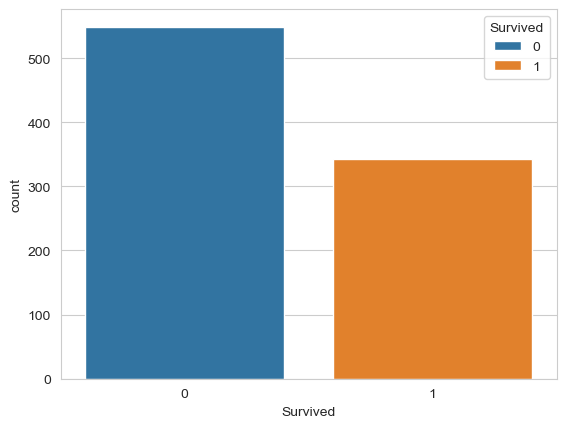

In [126]:
sns.countplot(x='Survived',data=titanic_data,hue='Survived')


In [127]:
# Number of female and male passengers
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

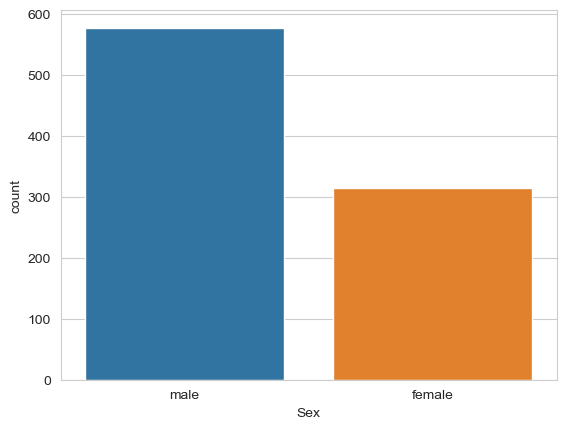

In [128]:
# Countplot for Sex column 0 : male 1: female
sns.countplot(x='Sex',data=titanic_data,hue='Sex')

<Axes: xlabel='Sex', ylabel='count'>

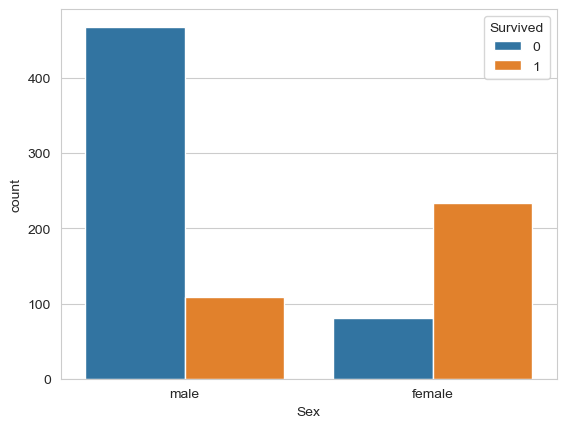

In [129]:
# Analyzing gender-wise survival
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

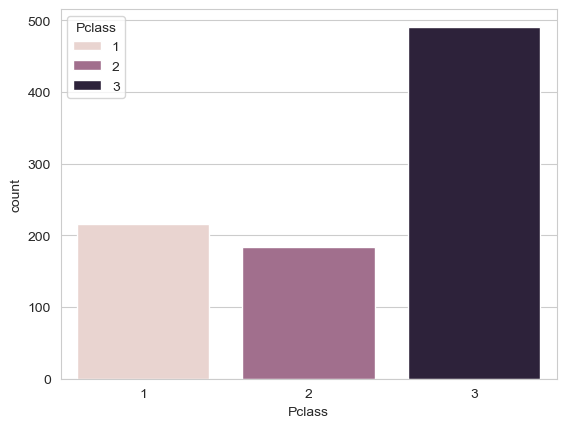

In [130]:
# Count plot for Pclass
# Most people travel in class 3.
sns.countplot(x='Pclass',data=titanic_data,hue='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

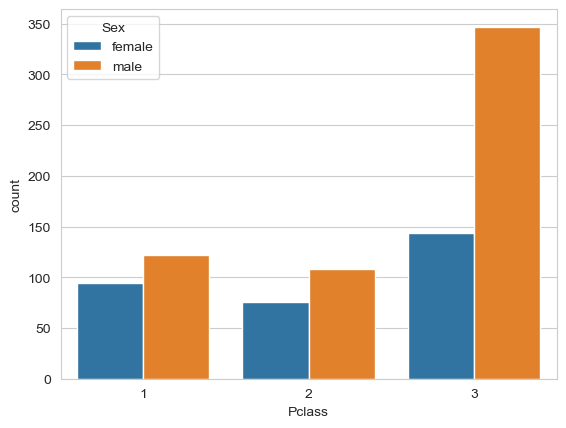

In [131]:
sns.countplot(x='Pclass',data=titanic_data,hue='Sex')
# The highest number of deaths is in class 3.
# Class 1 has the highest number of survivors.

### Encoding categorical columns in binary or numeric

In [132]:
titanic_data=titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

In [133]:
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=titanic_data['Survived']

In [134]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [135]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Splitting data into test and train data


In [136]:
#Training Testing and Spliting the model
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [137]:
X.shape,X_train.shape,X_test.shape

((891, 7), (712, 7), (179, 7))

### Logistic Regression and fitting the model


In [138]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.8212290502793296


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[108,  11],
       [ 21,  39]], dtype=int64)

### Using Support Vector

In [140]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,pred_y))

Acc= 0.6983240223463687


### Using KNN Neighbors

In [141]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.7430167597765364


### Using GaussianNB

In [142]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.8100558659217877


### Using Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=4)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.7988826815642458


In [144]:


results = pd.DataFrame({'Score': [0.82, 0.69, 0.81, 0.74, 0.80],
                        'Model': ['Logistic Regression', 'Support Vector', 'GaussianNB', 'KNN', 'Decision Tree']})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df = result_df[['Model', 'Score']]  
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.82,Logistic Regression
0.81,GaussianNB
0.80,Decision Tree
0.74,KNN
0.69,Support Vector
